In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# 1
1.	Please write a python program to convert cell count in cell-count.csv to relative frequency (in percentage) of total cell count for each sample. Total cell count of each sample is the sum of cells in the five populations of that sample. Please return an output file in csv format with cell count and relative frequency of each population of each sample per line. The output file should have the following columns:

sample: the sample id as in column sample in cell-count.csv
total_count: total cell count of sample
population: name of the immune cell population (e.g. b_cell, cd8_t_cell, etc.)
count: cell count
percentage: relative frequency in percentage


In [53]:
cell_data = pd.read_csv('cell-count.csv')

In [54]:
cell_data

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatmen_start,b_cell,cd8_t_cell,cd4_t_cell,nk_cell,monocyte
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,36000,24000,42000,6000,12000
1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,30000,22000,40000,2000,6000
2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,35000,26250,37500,10000,16250
3,prj1,sbj2,healthy,65,F,none,NaN,s4,PBMC,NaN,27900,17100,18000,4500,22500
4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,60000,30000,37500,4500,18000
5,prj1,sbj3,melanoma,75,M,tr1,n,s6,PBMC,7.0,27500,24200,33000,5500,19800
6,prj1,sbj4,lung,50,F,tr2,y,s7,PBMC,0.0,31350,19000,23750,8550,12350
7,prj1,sbj4,lung,50,F,tr2,y,s8,tumor,0.0,35000,23000,25000,6000,11000
8,prj1,sbj5,healthy,77,M,none,NaN,s9,PBMC,NaN,45500,27300,32500,6500,18200
9,prj2,sbj6,healthy,45,M,none,NaN,s10,PBMC,NaN,28420,21560,21560,8820,17640


In [55]:
cell_data['total_count']= cell_data['b_cell'] + cell_data['cd8_t_cell']+ cell_data['cd4_t_cell'] +  cell_data['nk_cell']+ cell_data['monocyte']


In [56]:
cell_data[['b_cell_freq','cd8_t_cell_freq','cd4_t_cell_freq','nk_cell_freq','monocyte_freq']] = cell_data.iloc[:, -6:-1].div(cell_data['total_count'],axis=0)
cell_data

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatmen_start,...,cd8_t_cell,cd4_t_cell,nk_cell,monocyte,total_count,b_cell_freq,cd8_t_cell_freq,cd4_t_cell_freq,nk_cell_freq,monocyte_freq
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,...,24000,42000,6000,12000,120000,0.30,0.20,0.35,0.05,0.10
1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,...,22000,40000,2000,6000,100000,0.30,0.22,0.40,0.02,0.06
2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,...,26250,37500,10000,16250,125000,0.28,0.21,0.30,0.08,0.13
3,prj1,sbj2,healthy,65,F,none,NaN,s4,PBMC,NaN,...,17100,18000,4500,22500,90000,0.31,0.19,0.20,0.05,0.25
4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,...,30000,37500,4500,18000,150000,0.40,0.20,0.25,0.03,0.12
5,prj1,sbj3,melanoma,75,M,tr1,n,s6,PBMC,7.0,...,24200,33000,5500,19800,110000,0.25,0.22,0.30,0.05,0.18
6,prj1,sbj4,lung,50,F,tr2,y,s7,PBMC,0.0,...,19000,23750,8550,12350,95000,0.33,0.20,0.25,0.09,0.13
7,prj1,sbj4,lung,50,F,tr2,y,s8,tumor,0.0,...,23000,25000,6000,11000,100000,0.35,0.23,0.25,0.06,0.11
8,prj1,sbj5,healthy,77,M,none,NaN,s9,PBMC,NaN,...,27300,32500,6500,18200,130000,0.35,0.21,0.25,0.05,0.14
9,prj2,sbj6,healthy,45,M,none,NaN,s10,PBMC,NaN,...,21560,21560,8820,17640,98000,0.29,0.22,0.22,0.09,0.18


In [57]:
types = ['b_cell','cd8_t_cell','cd4_t_cell','nk_cell','monocyte']
dfs = [] #this holds our dataframes
for t in types: #iterate through the cell populations to generate tables of only a respective population
    temp = cell_data[['sample','total_count',t,t+'_freq']]
    temp['count'] = temp[t] # I rename the population count to just count so I can concatenate matching column names
    temp['percentage'] = temp[t+'_freq'] #same with percentage
    temp = temp[['sample','total_count','count','percentage']]
    temp['Population'] = pd.Series([t for i in range(17)])
    dfs.append(temp)
res = pd.concat(dfs)
res.to_csv('out.csv')

/tmp/ipykernel_30/1708557096.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['count'] = temp[t] # I rename the population count to just count so I can concatenate matching column names
/tmp/ipykernel_30/1708557096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['percentage'] = temp[t+'_freq'] #same with percentage


In [58]:
res

,sample,total_count,count,percentage,Population
0,s1,120000,36000,0.30,b_cell
1,s2,100000,30000,0.30,b_cell
2,s3,125000,35000,0.28,b_cell
3,s4,90000,27900,0.31,b_cell
4,s5,150000,60000,0.40,b_cell
...,...,...,...,...,...
12,s13,115000,4600,0.04,monocyte
13,s14,100000,21000,0.21,monocyte
14,s15,80000,12000,0.15,monocyte
15,s16,100000,38000,0.38,monocyte


## 2 
2.	Among patients who have treatment tr1, we are interested in comparing the differences in cell population relative frequencies of melanoma patients who respond (responders) to tr1 versus those who do not (non-responders), with the overarching aim of predicting response to treatment tr1. Response information can be found in column response, with value y for responding and value n for non-responding. Please only include PBMC (blood) samples. 

a.	For each immune cell population, please generate a boxplot of the population relative frequencies comparing responders versus non-responders.
b.	Which cell populations show a difference between responders and non-responders? Please include statistics to support your conclusion.


In [59]:
#first filter for pbmc samples

cell_data = cell_data.loc[cell_data['sample_type'] == 'PBMC']
cell_data

,project,subject,condition,age,sex,treatment,response,sample,sample_type,time_from_treatmen_start,...,cd8_t_cell,cd4_t_cell,nk_cell,monocyte,total_count,b_cell_freq,cd8_t_cell_freq,cd4_t_cell_freq,nk_cell_freq,monocyte_freq
0,prj1,sbj1,melanoma,70,F,tr1,y,s1,PBMC,0.0,...,24000,42000,6000,12000,120000,0.30,0.20,0.35,0.05,0.10
1,prj1,sbj1,melanoma,70,F,tr1,y,s2,PBMC,7.0,...,22000,40000,2000,6000,100000,0.30,0.22,0.40,0.02,0.06
2,prj1,sbj1,melanoma,70,F,tr1,y,s3,PBMC,14.0,...,26250,37500,10000,16250,125000,0.28,0.21,0.30,0.08,0.13
3,prj1,sbj2,healthy,65,F,none,NaN,s4,PBMC,NaN,...,17100,18000,4500,22500,90000,0.31,0.19,0.20,0.05,0.25
4,prj1,sbj3,melanoma,75,M,tr1,n,s5,PBMC,0.0,...,30000,37500,4500,18000,150000,0.40,0.20,0.25,0.03,0.12
5,prj1,sbj3,melanoma,75,M,tr1,n,s6,PBMC,7.0,...,24200,33000,5500,19800,110000,0.25,0.22,0.30,0.05,0.18
6,prj1,sbj4,lung,50,F,tr2,y,s7,PBMC,0.0,...,19000,23750,8550,12350,95000,0.33,0.20,0.25,0.09,0.13
8,prj1,sbj5,healthy,77,M,none,NaN,s9,PBMC,NaN,...,27300,32500,6500,18200,130000,0.35,0.21,0.25,0.05,0.14
9,prj2,sbj6,healthy,45,M,none,NaN,s10,PBMC,NaN,...,21560,21560,8820,17640,98000,0.29,0.22,0.22,0.09,0.18
10,prj2,sbj7,healthy,80,F,none,NaN,s11,PBMC,NaN,...,19950,29400,8400,21000,105000,0.25,0.19,0.28,0.08,0.20


# Box Plots for B_Cell frequencies for Responders vs. Non Response

<Axes: xlabel='response', ylabel='b_cell_freq'>

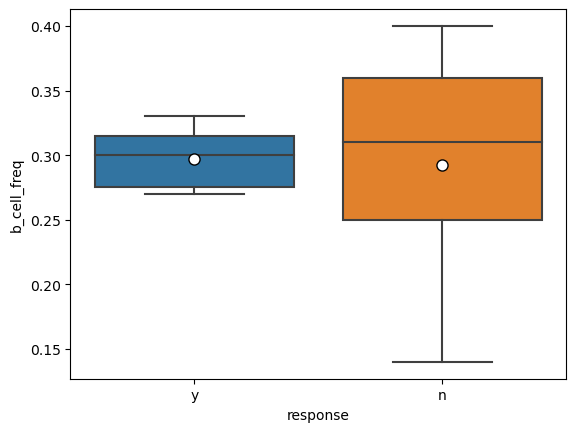

In [60]:
seaborn.boxplot(x='response',y='b_cell_freq',data= cell_data,showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})

# Box Plots for CD_8_T_Cell frequencies for Responders vs. Non Response

<Axes: xlabel='response', ylabel='cd8_t_cell_freq'>

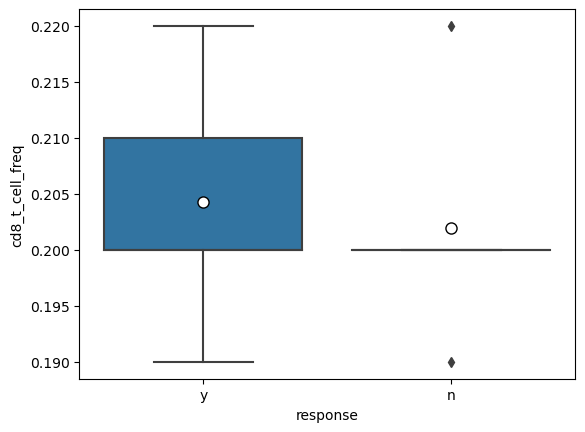

In [61]:
seaborn.boxplot(x='response',y='cd8_t_cell_freq',data= cell_data,showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})

# Box Plots for CD_4_T_Cell frequencies for Responders vs. Non Response

<Axes: xlabel='response', ylabel='cd4_t_cell_freq'>

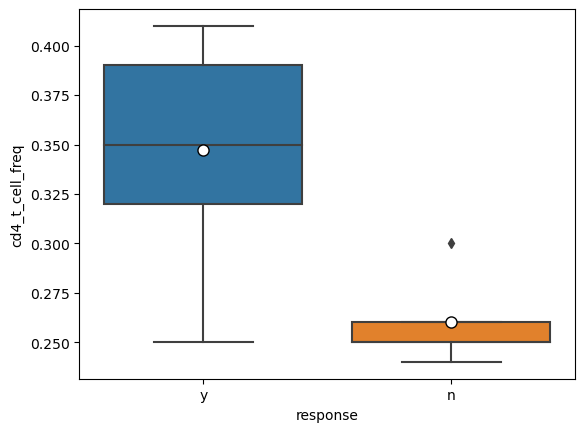

In [62]:
seaborn.boxplot(x='response',y='cd4_t_cell_freq',data= cell_data,showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})

# Box Plots for NK_Cell frequencies for Responders vs. Non Response

<Axes: xlabel='response', ylabel='nk_cell_freq'>

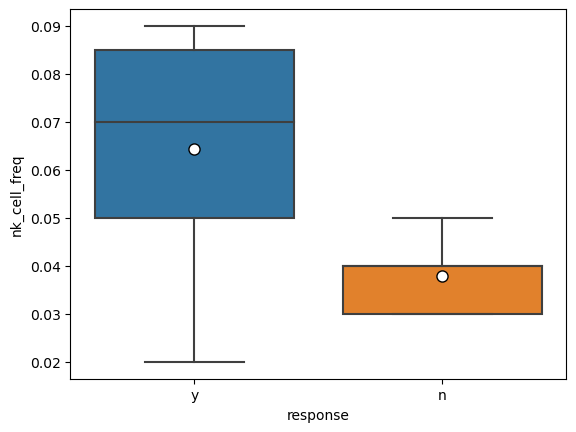

In [63]:
seaborn.boxplot(x='response',y='nk_cell_freq',data= cell_data,showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})

# Box Plots for Monocyte frequencies for Responders vs. Non Response

<Axes: xlabel='response', ylabel='monocyte_freq'>

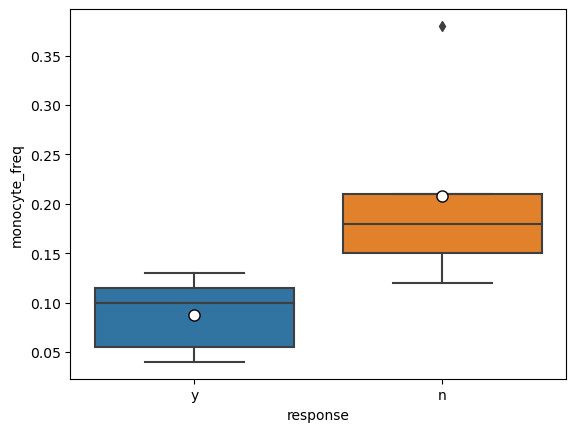

In [64]:
seaborn.boxplot(x='response',y='monocyte_freq',data= cell_data,showmeans=True,
            meanprops={'marker':'o',
                       'markerfacecolor':'white', 
                       'markeredgecolor':'black',
                       'markersize':'8'})

In just eyeballing the boxplots there is not much overlap over the cell populations, especially for nk_cell and monocyte populations, so there is likely there is a statistical difference between Responders and Non Responders, but below we will take a more rigorous approach.

To determine which Cell Populations display a statistical difference between Responders and Non Responders I will conduct a 2 sample t test, and in doing so I will assume that the Responders and Non-responders both share a normally distributed mean and equal variance. Here is the formula for the two tailed t test (we are only trying to discern a difference): 
Test statistic: (x1 – x2)  /  sp(√1/n1 + 1/n2)

where x1 and x2 are the sample means, n1 and n2 are the sample sizes, and where sp is calculated as:

sp = √ (n1-1)s12 +  (n2-1)s22 /  (n1+n2-2)
s12 will denote sample variance for the yes responders
s22 will denote smaple variance for the no responders
I used https://www.statology.org/t-score-p-value-calculator/ to calculate the p value for a two tailed t value I generate for each cell population 

In [65]:

n1 = len(cell_data.loc[cell_data['response'] == 'y']['b_cell_freq']) #n1 is yes
n2 = len(cell_data.loc[cell_data['response'] == 'n']['b_cell_freq'])

s22 = cell_data.loc[cell_data['response'] == 'n']['b_cell_freq'].std() ** 2
s12 = cell_data.loc[cell_data['response'] == 'y']['b_cell_freq'].std() ** 2

x2 = cell_data.loc[cell_data['response'] == 'n']['b_cell_freq'].mean()
x1 = cell_data.loc[cell_data['response'] == 'y']['b_cell_freq'].mean()

#plugin formula
sp = np.sqrt( ((n1-1)*s12 + (n2-1)*s22) / (n1+n2-2))
t_value = (x1-x2) / sp*np.sqrt(1/n1 + 1/n2)
t_value

0.04468109804738596

Given the above two tailed t_value with a df of 12-2 = 10 (we do not consider NaN responses), a 0.05 significance level, and a p value of .96, the result tells us there is no statistically significant difference between Responders and Non Responders for B_cell Frequencies and any deviations are due to chance.

In [66]:

n1 = len(cell_data.loc[cell_data['response'] == 'y']['cd8_t_cell_freq']) #n1 is yes
n2 = len(cell_data.loc[cell_data['response'] == 'n']['cd8_t_cell_freq'])

s22 = cell_data.loc[cell_data['response'] == 'n']['cd8_t_cell_freq'].std() ** 2
s12 = cell_data.loc[cell_data['response'] == 'y']['cd8_t_cell_freq'].std() ** 2

x2 = cell_data.loc[cell_data['response'] == 'n']['cd8_t_cell_freq'].mean()
x1 = cell_data.loc[cell_data['response'] == 'y']['cd8_t_cell_freq'].mean()

#plugin formula
sp = np.sqrt( ((n1-1)*s12 + (n2-1)*s22) / (n1+n2-2))
t_value = (x1-x2) / sp*np.sqrt(1/n1 + 1/n2)
t_value

0.13052348359317775

In [67]:
print(n1,n2)

7 5


Given the above two tailed t_value with a df of 12-2 = 10 (we do not consider NaN responses), a 0.05 significance level, and a p value of  0.89876, the result tells us there is no statistically significant difference between Responders and Non Responders for CD8_T_cell Frequencies and any deviations are due to chance.

In [68]:

n1 = len(cell_data.loc[cell_data['response'] == 'y']['cd4_t_cell_freq']) #n1 is yes
n2 = len(cell_data.loc[cell_data['response'] == 'n']['cd4_t_cell_freq'])

s22 = cell_data.loc[cell_data['response'] == 'n']['cd4_t_cell_freq'].std() ** 2
s12 = cell_data.loc[cell_data['response'] == 'y']['cd4_t_cell_freq'].std() ** 2

x2 = cell_data.loc[cell_data['response'] == 'n']['cd4_t_cell_freq'].mean()
x1 = cell_data.loc[cell_data['response'] == 'y']['cd4_t_cell_freq'].mean()

#plugin formula
sp = np.sqrt( ((n1-1)*s12 + (n2-1)*s22) / (n1+n2-2))
t_value = (x1-x2) / sp*np.sqrt(1/n1 + 1/n2)
t_value

1.0942841017299307

Given the above two tailed t_value with a df of 12-2 = 10 (we do not consider NaN responses), a 0.05 significance level, and a p value of  0.29961, the result tells us there is no statistically significant difference between Responders and Non Responders for CD4_T_cell Frequencies and any deviations are due to chance.

In [69]:

n1 = len(cell_data.loc[cell_data['response'] == 'y']['nk_cell_freq']) #n1 is yes
n2 = len(cell_data.loc[cell_data['response'] == 'n']['nk_cell_freq'])

s22 = cell_data.loc[cell_data['response'] == 'n']['nk_cell_freq'].std() ** 2
s12 = cell_data.loc[cell_data['response'] == 'y']['nk_cell_freq'].std() ** 2

x2 = cell_data.loc[cell_data['response'] == 'n']['nk_cell_freq'].mean()
x1 = cell_data.loc[cell_data['response'] == 'y']['nk_cell_freq'].mean()

#plugin formula
sp = np.sqrt( ((n1-1)*s12 + (n2-1)*s22) / (n1+n2-2))
t_value = (x1-x2) / sp*np.sqrt(1/n1 + 1/n2)
t_value

0.7464641250104284

Given the above two tailed t_value with a df of 12-2 = 10 (we do not consider NaN responses), a 0.05 significance level, and a p value of 0.47284, the result tells us there is no statistically significant difference between Responders and Non Responders for NK_cell Frequencies and any deviations are due to chance.

In [70]:

n1 = len(cell_data.loc[cell_data['response'] == 'y']['monocyte_freq']) #n1 is yes
n2 = len(cell_data.loc[cell_data['response'] == 'n']['monocyte_freq'])

s22 = cell_data.loc[cell_data['response'] == 'n']['monocyte_freq'].std() ** 2
s12 = cell_data.loc[cell_data['response'] == 'y']['monocyte_freq'].std() ** 2

x2 = cell_data.loc[cell_data['response'] == 'n']['monocyte_freq'].mean()
x1 = cell_data.loc[cell_data['response'] == 'y']['monocyte_freq'].mean()

#plugin formula
sp = np.sqrt( ((n1-1)*s12 + (n2-1)*s22) / (n1+n2-2))
t_value = (x1-x2) / sp*np.sqrt(1/n1 + 1/n2)
t_value

-1.0025697791906922

Given the above two tailed t_value with a df of 12-2 = 10 (we do not consider NaN responses), a 0.05 significance level, and a p value of 0.33997, the result tells us there is no statistically significant difference between Responders and Non Responders for Monocyte Frequencies and any deviations are due to chance.